# Blood Donor Survey Results

These are the results of a survey that I conducted on [r/SampleSize](https://www.reddit.com/r/SampleSize/) and [r/Blooddonors](https://www.reddit.com/r/Blooddonors/) in October of 2025. The dataset includes 179 responses.  
[Download the .csv dataset (CC0 license)](blood_donor_survey.csv)  
[Download the .ipynb Jupyter Notebook](blood_donor_survey.ipynb).

The dataset contains the following features:

- **Blood Type**: The respondent's blood type.  
  `["A+", "A-", "B+", "B-", "AB+", "AB-", "O+", "O-", "I don't know"]`

- **Known Blood Type**: Whether the respondent knew their blood type before the first time they donated.  
  `["Yes", "No", "I don't remember"]`

- **First Donation Age**: The age when the respondent first donated.  
  `[an integer]`

- **Donation Count**: The number of times a respondent has donated.  
  `[an integer]`

- **12 Month Donation**: Whether the respondent has donated in the last 12 months.  
  `["Yes", "No"]`

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('blood_donor_survey.csv')

# Section I: Results
These are the results for the five questions on the survey.

**Survey Question 1**: What is your blood type?  
In addition to the eight blood types, respondents were given the option of selecting "I don't know".

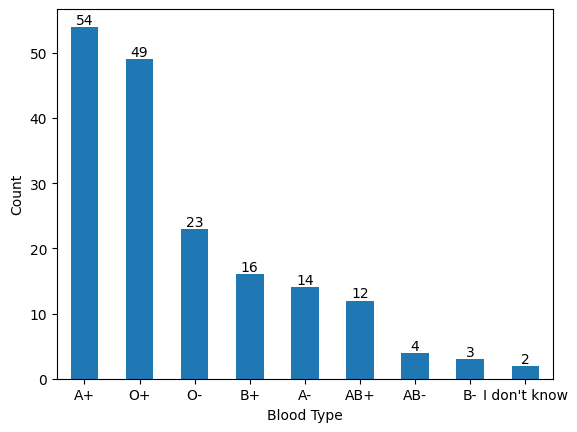

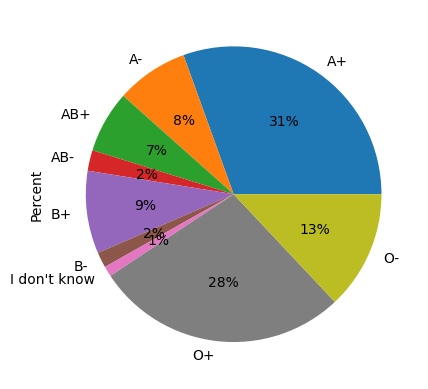

In [32]:
df_selected = df['Blood Type'].value_counts().reset_index()
ax = df_selected.plot(kind='bar', x='Blood Type', ylabel='Count', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()
df_selected = df_selected.groupby('Blood Type').sum()
df_selected.plot(kind='pie', y='count', ylabel='Percent', autopct='%1.0f%%', legend=False)
plt.show()

**Survey Question 2**: Did you know your blood type before the first time you donated blood?  
Respondents were given the options of "Yes", "No", and "I don't remember."

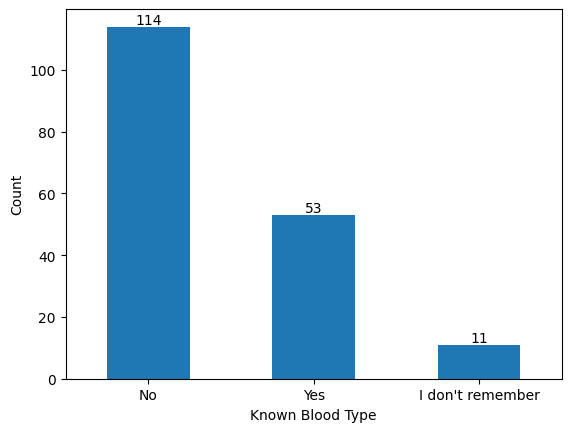

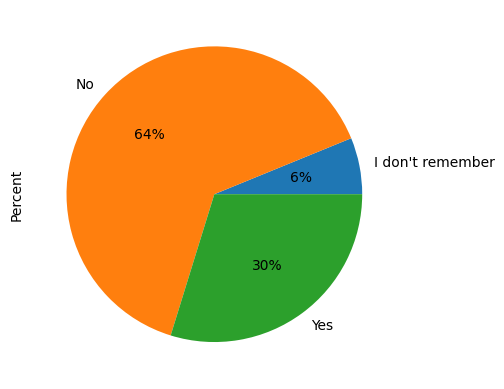

In [33]:
df_selected = df['Known Blood Type'].value_counts().reset_index()
ax = df_selected.plot(kind='bar', x='Known Blood Type', ylabel='Count', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()
df_selected = df_selected.groupby('Known Blood Type').sum()
df_selected.plot(kind='pie', y='count', ylabel='Percent', autopct='%1.0f%%', legend=False)
plt.show()

**Survey Question 3**: How old were you the first time you donated?  
Respondents were instructed to make their best guess if they weren't sure.

       First Donation Age
count          177.000000
mean            22.819209
std              7.894264
min             15.000000
25%             18.000000
50%             20.000000
75%             25.000000
max             51.000000


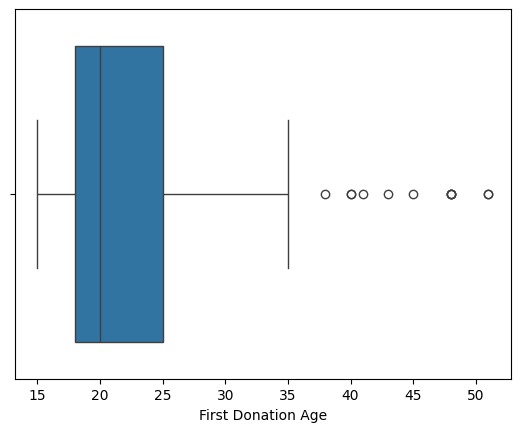

In [34]:
df_selected = df['First Donation Age'].reset_index()
df_selected.drop(columns='index', inplace=True)
df_selected.dropna(inplace=True)
print(df_selected.describe())
sns.boxplot(data=df_selected, x='First Donation Age')
plt.show()

**Survey Question 4**: How many times have you successfully donated?  
Respondents were instructed to make their best guess if they weren't sure.

       Donation Count
count      178.000000
mean        35.814607
std         60.707360
min          1.000000
25%          5.000000
50%         15.000000
75%         37.500000
max        513.000000


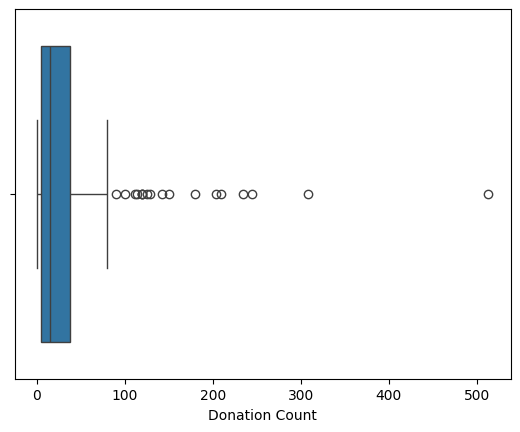

In [35]:
df_selected = df['Donation Count'].reset_index()
df_selected.drop(columns='index', inplace=True)
df_selected.dropna(inplace=True)
print(df_selected.describe())
sns.boxplot(data=df_selected, x='Donation Count')
plt.show()

**Survey Question 5**: Have you donated in the last 12 months?  
Respondents were given the option to answer "I'm not sure," but no one selected that option.

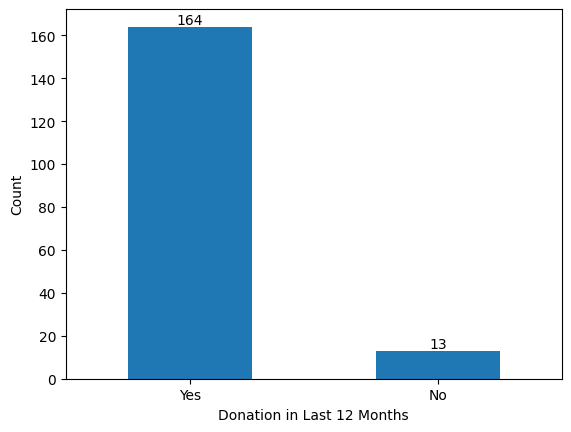

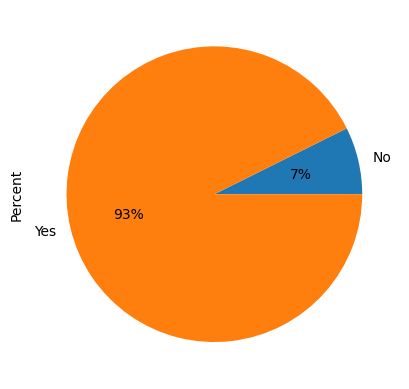

In [36]:
df_selected = df['12 Month Donation'].value_counts().reset_index()
ax = df_selected.plot(kind='bar', x='12 Month Donation', xlabel='Donation in Last 12 Months', ylabel='Count', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()
df_selected = df_selected.groupby('12 Month Donation').sum()
df_selected.plot(kind='pie', y='count', ylabel='Percent', autopct='%1.0f%%', legend=False)
plt.show()

# Section II: Analysis
In this section, we will dive deeper into the data.

**Analysis Question 1**: How does the distribution of blood types in the survey results compare with the distribution of blood types worldwide?  
For comparison, I used the data at the Wikipedia article on [Blood type distribution by country](https://en.wikipedia.org/wiki/Blood_type_distribution_by_country).

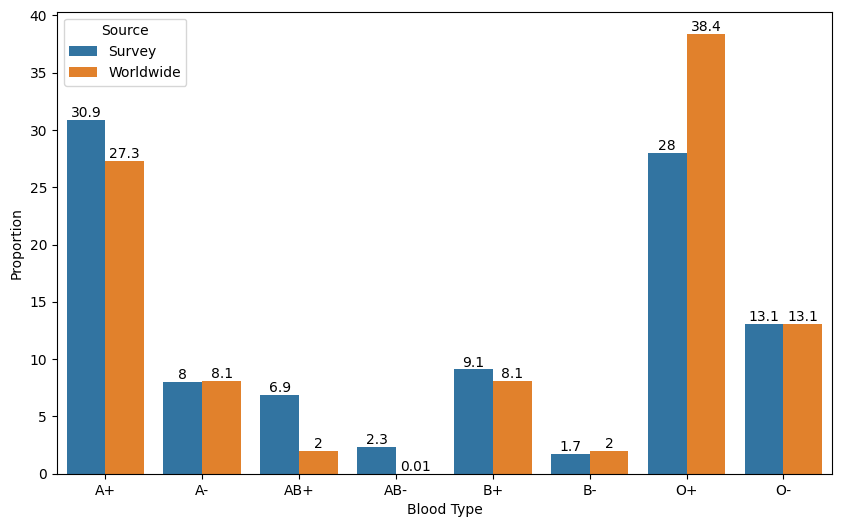

In [37]:
df_worldwide = pd.DataFrame({'Blood Type': ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-'], 
                             'Worldwide': [38.4, 27.3, 8.1, 2.0, 13.1, 8.1, 2.0, 0.01]})
df_selected = df['Blood Type'].value_counts().reset_index()
df_selected.drop(df_selected[df_selected['Blood Type'] == 'I don\'t know'].index, inplace=True)
df_selected['Survey'] = round(100 * df_selected['count'] / df_selected['count'].sum(), 1)
df_selected = pd.merge(left=df_selected, right=df_worldwide, on='Blood Type', how='outer')
df_melted = df_selected.melt(id_vars='Blood Type', value_vars=['Survey', 'Worldwide'],
                    var_name='Source', value_name='Proportion')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_melted, x='Blood Type', y='Proportion', hue='Source')
plt.ylabel('Proportion')
plt.xlabel('Blood Type')
plt.legend(title='Source')
for c in ax.containers:
    ax.bar_label(c)
plt.show()

**Analysis Question 2**: Is there a difference in the mean and median age a person first donates if they know their blood type beforehand?

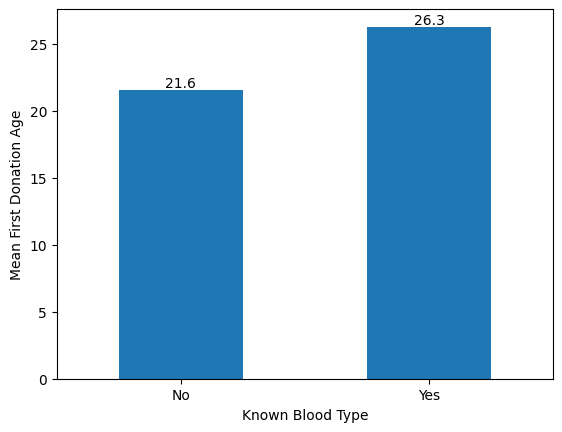

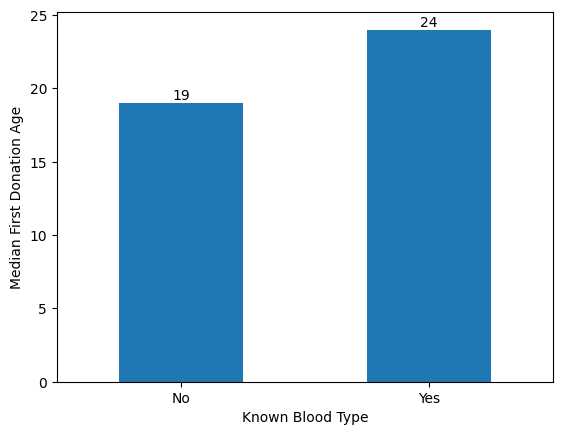

In [38]:
df_selected = df[['Known Blood Type', 'First Donation Age']].copy()
df_selected.dropna(inplace=True)
df_selected.drop(df_selected[df_selected['Known Blood Type'] == 'I don\'t remember'].index, inplace=True)
df_selected = df_selected.groupby('Known Blood Type', as_index=False)['First Donation Age'].mean()
df_selected.rename(columns={'First Donation Age': 'Mean First Donation Age'}, inplace=True)
df_selected['Mean First Donation Age'] = round(df_selected['Mean First Donation Age'], 1)
df_selected.sort_values(by='Known Blood Type', inplace=True)
ax = df_selected.plot(kind='bar', x='Known Blood Type', ylabel='Mean First Donation Age', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()
df_selected = df[['Known Blood Type', 'First Donation Age']].copy()
df_selected.dropna(inplace=True)
df_selected.drop(df_selected[df_selected['Known Blood Type'] == 'I don\'t remember'].index, inplace=True)
df_selected = df_selected.groupby('Known Blood Type', as_index=False)['First Donation Age'].median()
df_selected.rename(columns={'First Donation Age': 'Median First Donation Age'}, inplace=True)
df_selected.sort_values(by='Known Blood Type', inplace=True)
ax = df_selected.plot(kind='bar', x='Known Blood Type', ylabel='Median First Donation Age', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()

**Analysis Question 3**: For people who knew their blood type before the first time they donated, which blood types had lower mean and median ages at which they first donated?

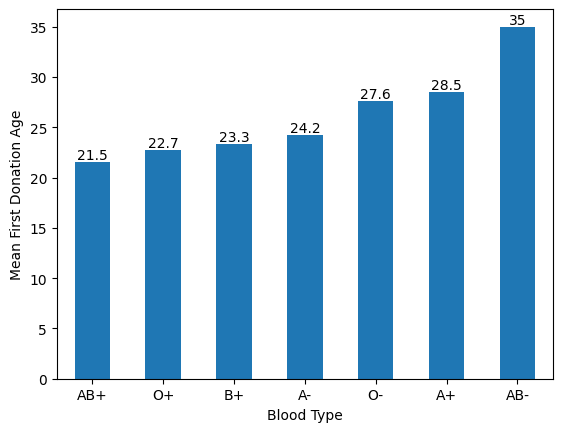

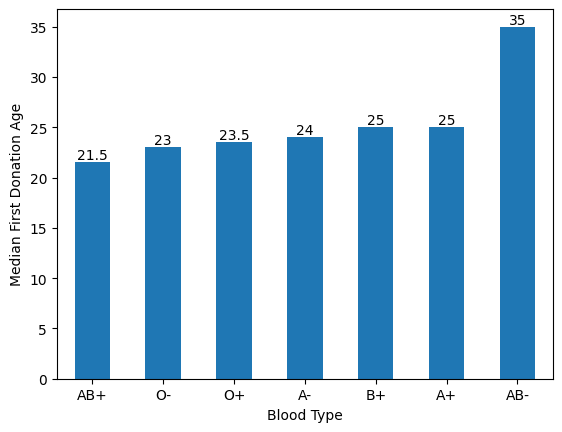

In [39]:
df_selected = df[['Blood Type', 'Known Blood Type', 'First Donation Age']].copy()
df_selected.dropna(inplace=True)
df_selected = df_selected[df_selected['Known Blood Type'] == 'Yes']
df_selected = df_selected.groupby('Blood Type', as_index=False)['First Donation Age'].mean()
df_selected.rename(columns={'First Donation Age': 'Mean First Donation Age'}, inplace=True)
df_selected['Mean First Donation Age'] = round(df_selected['Mean First Donation Age'], 1)
df_selected.sort_values(by='Mean First Donation Age', inplace=True)
ax = df_selected.plot(kind='bar', x='Blood Type', ylabel='Mean First Donation Age', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()
df_selected = df[['Blood Type', 'Known Blood Type', 'First Donation Age']].copy()
df_selected.dropna(inplace=True)
df_selected = df_selected[df_selected['Known Blood Type'] == 'Yes']
df_selected = df_selected.groupby('Blood Type', as_index=False)['First Donation Age'].median()
df_selected.rename(columns={'First Donation Age': 'Median First Donation Age'}, inplace=True)
df_selected.sort_values(by='Median First Donation Age', inplace=True)
ax = df_selected.plot(kind='bar', x='Blood Type', ylabel='Median First Donation Age', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()

**Analysis Question 4**: Which blood types have higher mean and median counts of donations?

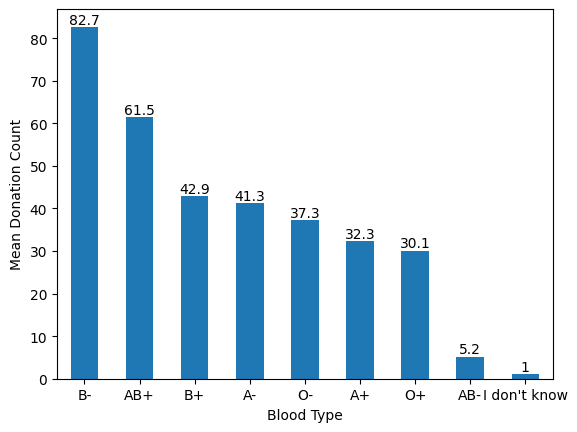

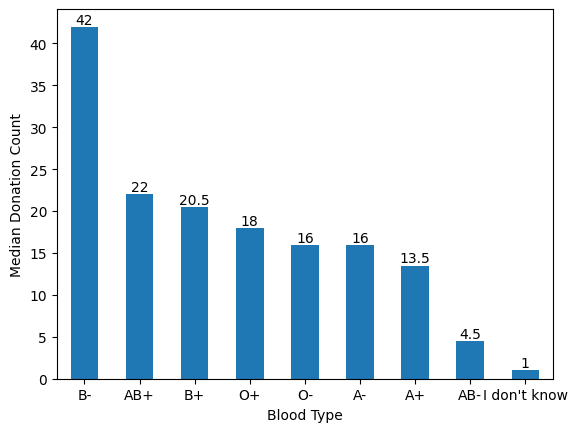

In [40]:
df_selected = df[['Blood Type', 'Donation Count']].copy()
df_selected.dropna(inplace=True)
df_selected = df_selected.groupby('Blood Type', as_index=False)['Donation Count'].mean()
df_selected.rename(columns={'Donation Count': 'Mean Donation Count'}, inplace=True)
df_selected['Mean Donation Count'] = round(df_selected['Mean Donation Count'], 1)
df_selected.sort_values(by='Mean Donation Count', ascending=False, inplace=True)
ax = df_selected.plot(kind='bar', x='Blood Type', ylabel='Mean Donation Count', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()
df_selected = df[['Blood Type', 'Donation Count']].copy()
df_selected.dropna(inplace=True)
df_selected = df_selected.groupby('Blood Type', as_index=False)['Donation Count'].median()
df_selected.rename(columns={'Donation Count': 'Median Donation Count'}, inplace=True)
df_selected.sort_values(by='Median Donation Count', ascending=False, inplace=True)
ax = df_selected.plot(kind='bar', x='Blood Type', ylabel='Median Donation Count', legend=False, rot=0)
for c in ax.containers:
    ax.bar_label(c)
plt.show()